In [6]:

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

# Build a quantum circuit
circuit = QuantumCircuit(3, 3)

circuit.x(1)
circuit.h(range(3))
circuit.cx(0, 1)
circuit.measure(range(3), range(3));

In [7]:
print(circuit)

     ┌───┐          ┌─┐   
q_0: ┤ H ├───────■──┤M├───
     ├───┤┌───┐┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ H ├┤ X ├─╫─┤M├
     ├───┤└┬─┬┘└───┘ ║ └╥┘
q_2: ┤ H ├─┤M├───────╫──╫─
     └───┘ └╥┘       ║  ║ 
c: 3/═══════╩════════╩══╩═
            2        0  1 


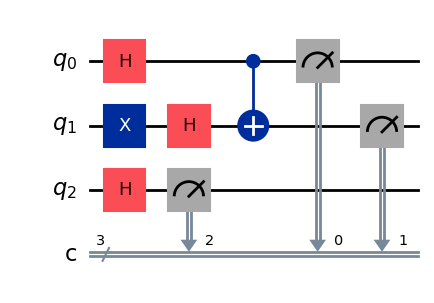

In [8]:
# Matplotlib Drawing
circuit.draw(output='mpl')

In [21]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram, circuit_drawer
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from src.utils import *


In [84]:
mygraph = generate_random_graphs(1, 5)[0]

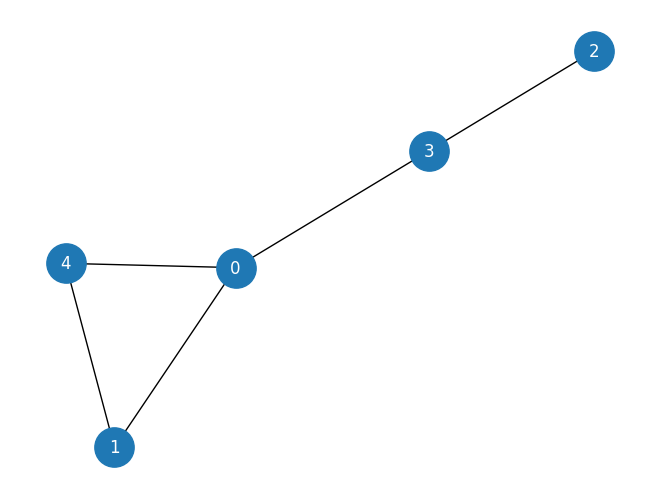

In [85]:
show_graph(mygraph, node_size=800)

In [86]:
# Function to create the QAOA circuit for MaxCut
def create_qaoa_circuit(G, p, gamma, beta):
    n = len(G.nodes)
    qc = QuantumCircuit(n, n)
    
    # Initial state
    qc.h(range(n))
    
    for _ in range(p):
        # Apply the problem unitary (U_C)
        for i, j in G.edges():
            qc.cx(i, j)
            qc.rz(2 * gamma, j)
            qc.cx(i, j)
        
        # Apply the mixer unitary (U_B)
        qc.rx(2 * beta, range(n))
    
    # Measurement
    qc.measure(range(n), range(n))
    
    return qc

In [87]:

# Parameters for the QAOA
p = 1  # Number of QAOA layers
gamma = np.pi / 3
beta = np.pi / 4

# Create the QAOA circuit
qaoa_circuit = create_qaoa_circuit(mygraph, p, gamma, beta)

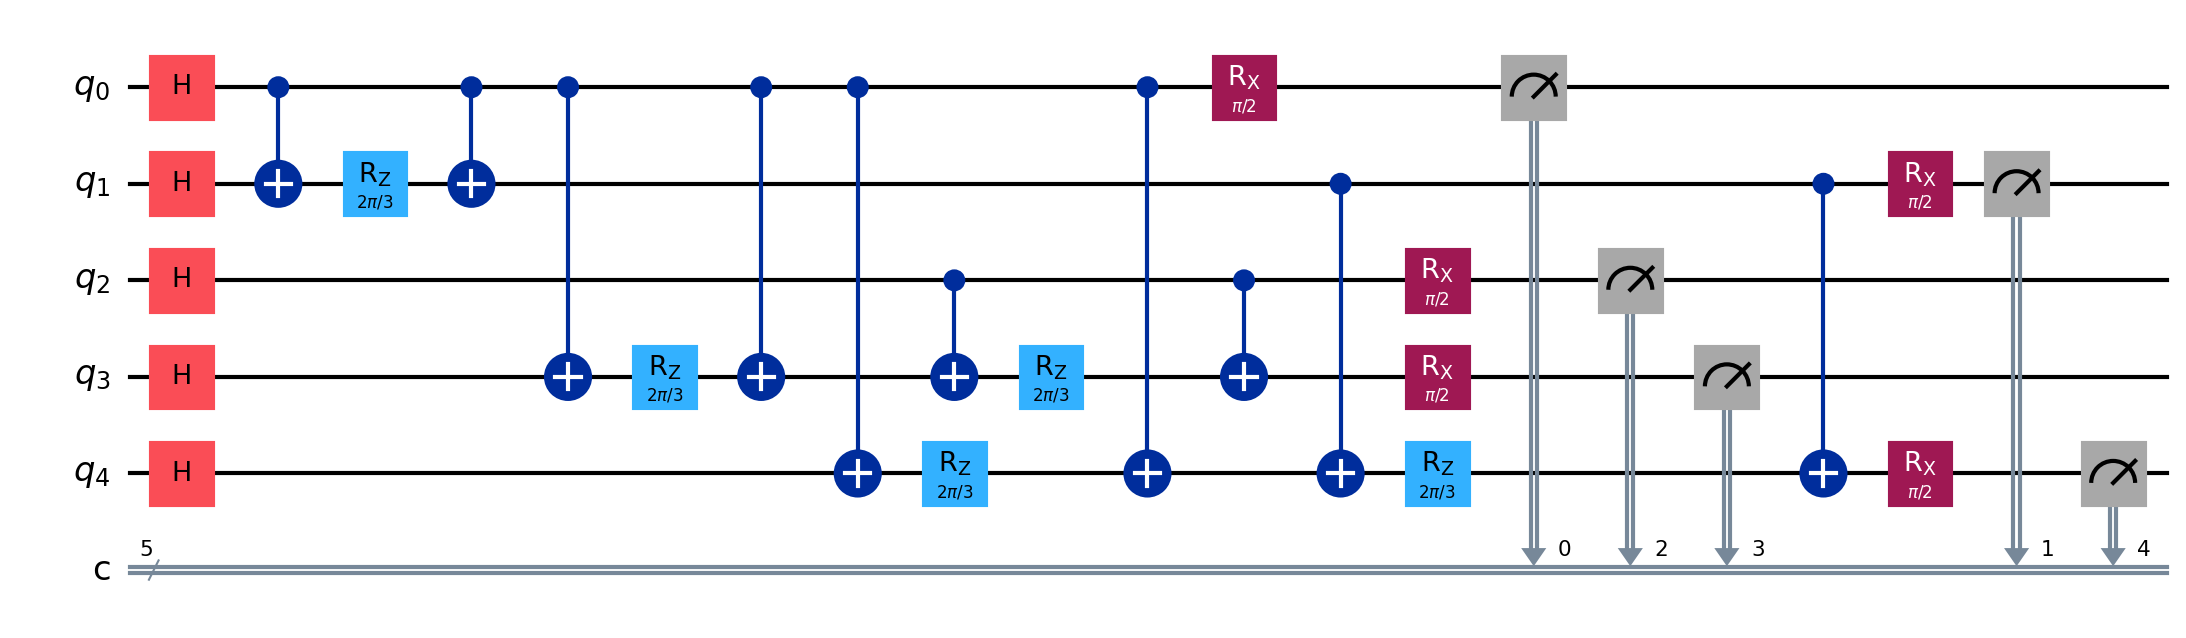

In [88]:
qaoa_circuit.draw(output='mpl', scale=1.5)